In [29]:
import torch

import numpy as np

from braindecode.util import set_random_seeds
from braindecode.datasets.base import BaseConcatDataset

from skorch.callbacks import EpochScoring, ProgressBar
from skorch.helper import predefined_split

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from utils.datasets import get_sleep_physionet, TimeContrastiveDataset
from utils.skorch import EEGTransformer
from utils.plot import sleep_cmap, rand_cmap
from models.contrastive import ContrastiveModule, EncoderNet

In [2]:
windows_dataset, info = get_sleep_physionet()

Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4041E0-PSG.edf...
EDF file detected
Setting channel info

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4421E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4431E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4441E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_data/physionet-sleep-data/SC4451F0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /mnt/285EDDF95EDDC02C/Users/Public/Documents/mne_d

- Filter length: 45 samples (0.450 sec)

Reading 0 ... 2850000  =      0.000 ... 28500.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3705000  =      0.000 ... 37050.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff


Reading 0 ... 4569000  =      0.000 ... 45690.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3018000  =      0.000 ... 30180.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 2673000  =      0.000 ... 26730.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 5193000  =      0.000 

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3654000  =      0.000 ... 36540.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3702000  =      0.000 ... 37020.000 secs...
Filtering raw data in


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3972000  =      0.000 ... 39720.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 45 samples (0.450 sec)

Reading 0 ... 3720000  =      0.000 ... 37200.000 secs...
Filtering raw data in 1 contiguous segment
Setting up low

Replacing existing metadata with 4 columns
941 matching events found
No baseline correction applied
0 projection items activated
Loading data for 941 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1140 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1140 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
952 matching events found
No baseline correction applied
0 projection items activated
Loading data for 952 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: [

Loading data for 1732 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1060 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1060 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1077 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1077 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing 

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1271 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1271 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
2026 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2026 events and 3000 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Adding metadata with 4 columns
Replacing existing metadata with 4 columns
1968 matching events found
No baseline correction applied
0 projection items activated
Loading data fo

In [3]:
splitted = windows_dataset.split('subject')

valid_proportion = 0.2
subjects = list(splitted.keys())
np.random.shuffle(subjects)
train_subjects = subjects[int(len(subjects) * valid_proportion):]
valid_subjects = subjects[:int(len(subjects) * valid_proportion)]

train_set = TimeContrastiveDataset([splitted[s] for s in train_subjects], delta_index_positive=5, delta_index_negative=20)
valid_set = TimeContrastiveDataset([splitted[s] for s in valid_subjects], delta_index_positive=5, delta_index_negative=20)

In [28]:
n_channels = 2
dropout = 0.5
sfreq = 100

encoder = EncoderNet(n_channels=n_channels, sfreq=sfreq, n_conv_chs=8, time_conv_size_s=0.5,
                     max_pool_size_s=0.125, input_size_s=30,
                     dropout=dropout, apply_batch_norm=False)
network = ContrastiveModule(encoder)

ModuleAttributeError: 'EncoderNet' object has no attribute 'num_features'

In [6]:
# Train using a GPU if possible
cuda = torch.cuda.is_available()
device = "cuda" if cuda else "cpu"
set_random_seeds(seed=0, cuda=cuda)

network.to(device)

# Hyperparameters
lr = 5e-4
batch_size = 1000
nb_epochs = 5

# Callbacks
train_bal_acc = EpochScoring(
    scoring='balanced_accuracy', on_train=True, name='train_bal_acc',
    lower_is_better=False)
valid_bal_acc = EpochScoring(
    scoring='balanced_accuracy', on_train=False, name='valid_bal_acc',
    lower_is_better=False)
callbacks = [
    ('train_bal_acc', train_bal_acc),
    ('valid_bal_acc', valid_bal_acc),
    ('progress_bar', ProgressBar()),
]

# Skorch model creation
net = EEGTransformer(
    network,
    criterion=torch.nn.CrossEntropyLoss,
    optimizer=torch.optim.Adam,
    optimizer__lr=lr,
    train_split=predefined_split(valid_set),
    batch_size=batch_size,
    callbacks=callbacks,
    device=device
)

# Training: `y` is None since it is already supplied in the dataset.
net = net.fit(train_set, y=None, epochs=nb_epochs)

  epoch    train_bal_acc    train_loss    valid_bal_acc    valid_loss      dur
-------  ---------------  ------------  ---------------  ------------  -------
      1           0.7188        0.5494           0.7658        0.4922  54.8407


      2           0.7773        0.4781           0.7846        0.4692  55.0564


      3           0.7880        0.4603           0.7935        0.4552  56.2297


      4           0.7936        0.4497           0.7957        0.4515  57.3546


# Predictions

In [13]:
embds = net.transform(valid_set)[::2]

# Plot

In [24]:
mapping = {  # We merge stages 3 and 4 following AASM standards.
    'Sleep stage W': 0,
    'Sleep stage 1': 1,
    'Sleep stage 2': 2,
    'Sleep stage 3': 3,
    'Sleep stage 4': 3,
    'Sleep stage R': 4
}

reverse_mapping = {v: k[-1] for k,v in mapping.items()}

In [16]:
sleep_stages = [x[1] for x in BaseConcatDataset([splitted[s] for s in valid_subjects])]

Text(0.5, 1.0, 'PCA of self-supervised embeddings according to sleep stages')

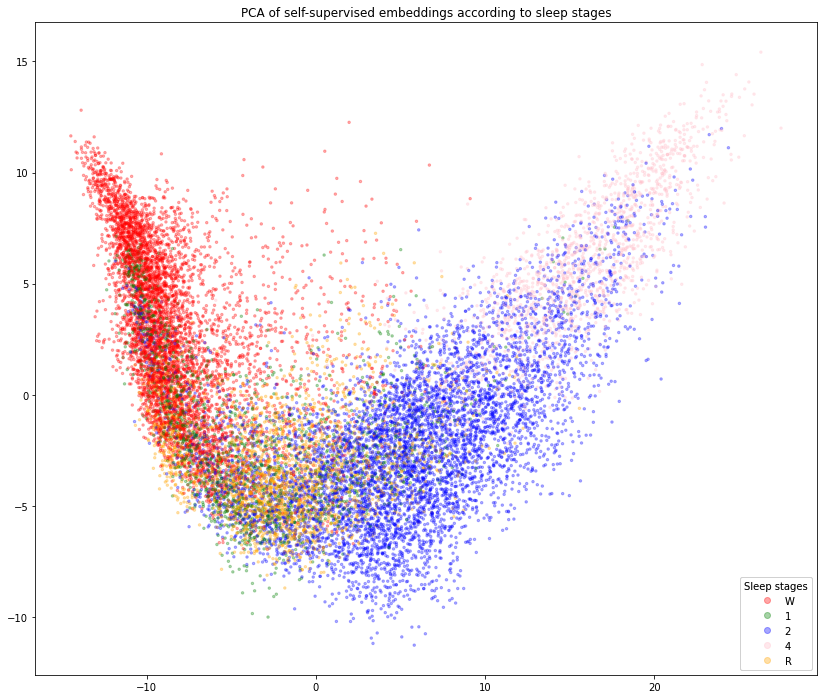

In [37]:
pca = PCA(2)
pca_embds = pca.fit_transform(embds)

plt.figure(figsize=(14,12))
scatter = plt.scatter(pca_embds[:,0], pca_embds[:,1], c=sleep_stages, cmap=sleep_cmap, alpha=0.3, s=6)
legend = plt.legend(*scatter.legend_elements(prop="colors"),
                    loc="lower right", title="Sleep stages")
for i in range(len(legend.get_texts())):
    legend.get_texts()[i].set_text(reverse_mapping[i])
plt.gca().add_artist(legend)
plt.title("PCA of self-supervised embeddings according to sleep stages")

Text(0.5, 1.0, 'TSNE of self-supervised embeddings according to sleep stages')

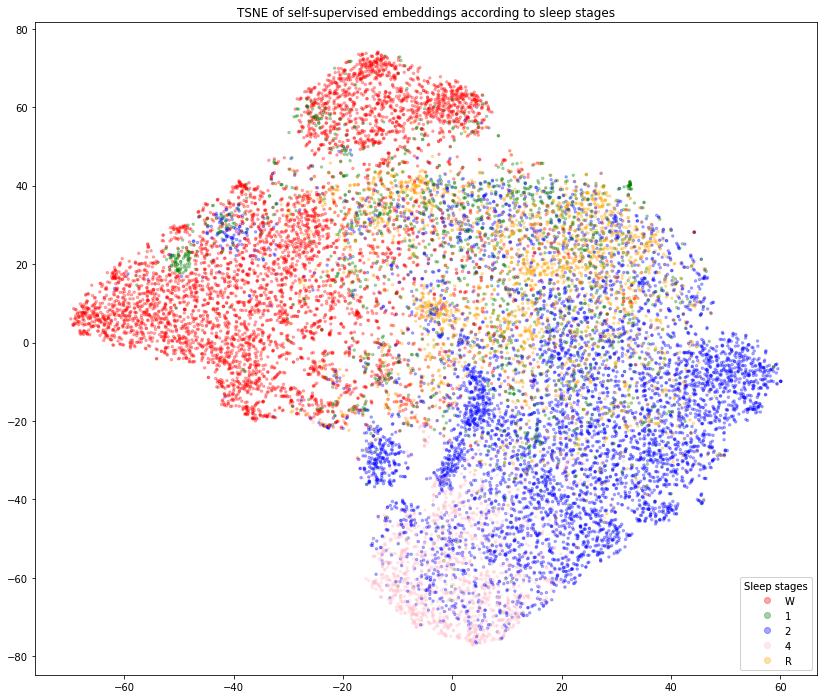

In [38]:
tsne = TSNE(2, n_jobs=-1)
tsne_embds = tsne.fit_transform(embds)

plt.figure(figsize=(14,12))
scatter = plt.scatter(tsne_embds[:,0], tsne_embds[:,1], c=sleep_stages, cmap=sleep_cmap, alpha=0.3, s=6)
legend = plt.legend(*scatter.legend_elements(prop="colors"),
                    loc="lower right", title="Sleep stages")
for i in range(len(legend.get_texts())):
    legend.get_texts()[i].set_text(reverse_mapping[i])
plt.gca().add_artist(legend)
plt.title('TSNE of self-supervised embeddings according to sleep stages')

In [29]:
ages = [i for s in valid_subjects for i in [info[info['subject'] == int(s)]['age'].iloc[0]]*len(splitted[s])]

Text(0.5, 1.0, 'PCA of self-supervised embeddings according to age')

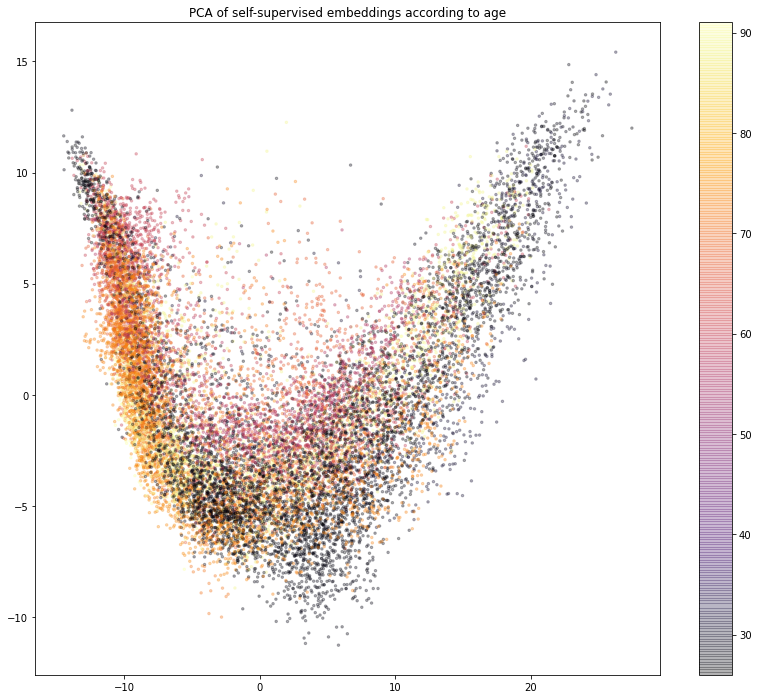

In [36]:
plt.figure(figsize=(14,12))
plt.scatter(pca_embds[:,0], pca_embds[:,1], c=ages, alpha=0.3, s=6, cmap=plt.get_cmap('inferno'))
plt.colorbar()
plt.title('PCA of self-supervised embeddings according to age')

Text(0.5, 1.0, 'TSNE of self-supervised embeddings according to age')

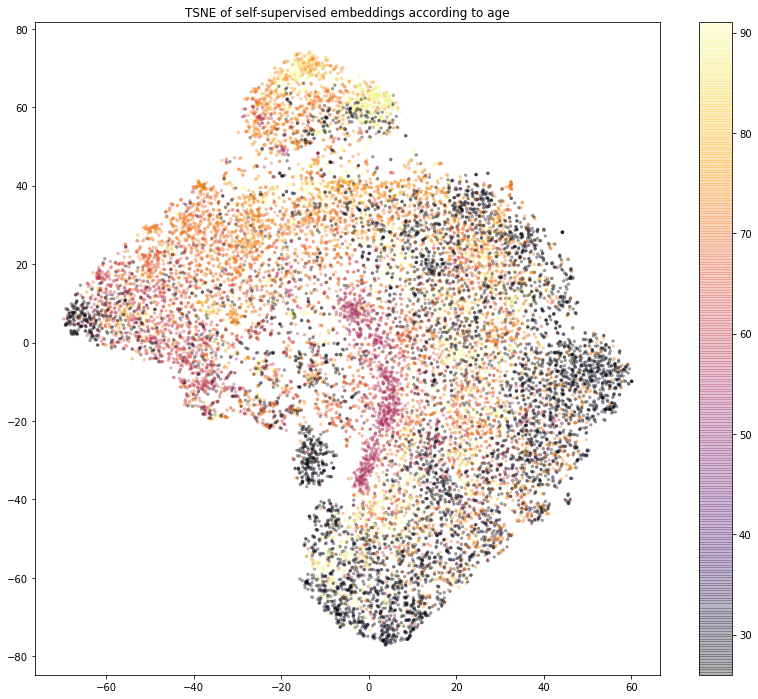

In [39]:
plt.figure(figsize=(14,12))
plt.scatter(tsne_embds[:,0], tsne_embds[:,1], c=ages, alpha=0.3, s=6, cmap=plt.get_cmap('inferno'))
plt.colorbar()
plt.title('TSNE of self-supervised embeddings according to age')

In [44]:
subject = [int(i) for s in valid_subjects for i in [s]*len(splitted[s])]
new_cmap = rand_cmap(max(subject), type='bright', first_color_black=True, last_color_black=False, verbose=False)

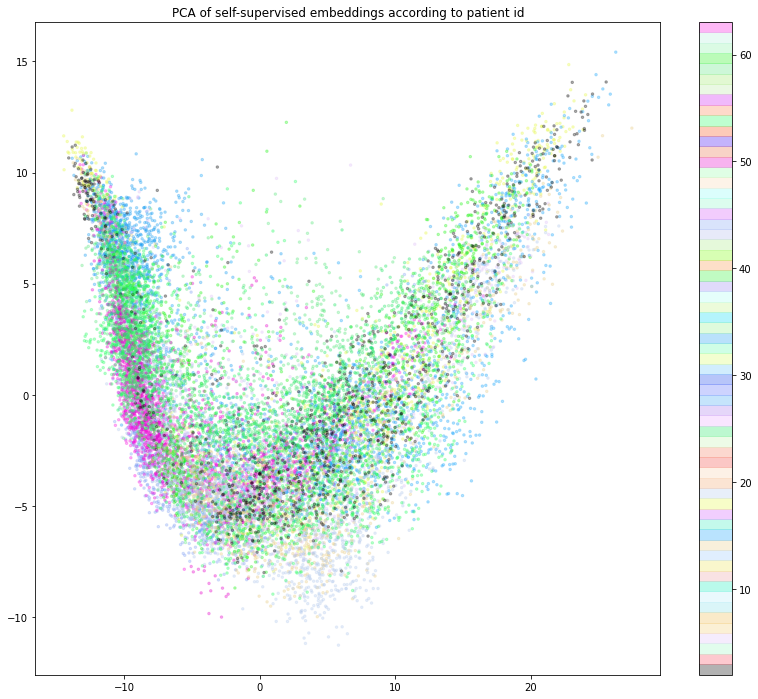

In [45]:
plt.figure(figsize=(14,12))
plt.scatter(pca_embds[:,0], pca_embds[:,1], c=subject, alpha=0.3, s=6, cmap=new_cmap)
plt.colorbar()
plt.title('PCA of self-supervised embeddings according to patient id')
plt.show()

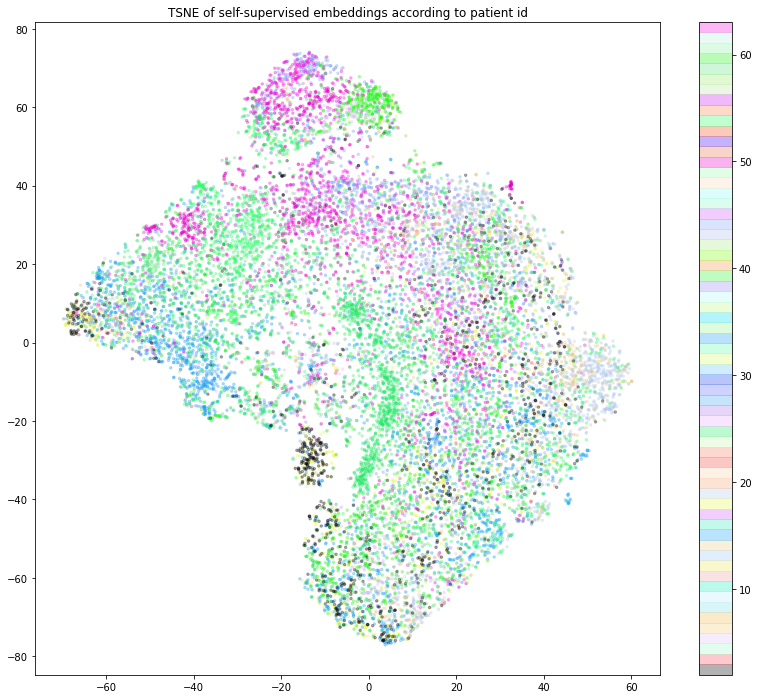

In [46]:
plt.figure(figsize=(14,12))
plt.scatter(tsne_embds[:,0], tsne_embds[:,1], c=subject, alpha=0.3, s=6, cmap=new_cmap)
plt.colorbar()
plt.title('TSNE of self-supervised embeddings according to patient id')
plt.show()

# Downstream task